In [1]:
import os
import pandas as pd
import json
import monai
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import ast

 missing cuda symbols while dynamic loading
 cuFile initialization failed


# Validation

In [5]:

# Creating  tables
path = "/mnt/ceib/datalake/FISABIO_datalake/prueba/p0042021"
derivatives_path = "/mnt/ceib/datalake/FISABIO_datalake/prueba/p0042021/derivatives/creating_adc"
t2_list = []
adc_list = []
dwi_list = []

# Creating a list of all the files in the directory starting with sub-*
subjects = [f for f in os.listdir(path) if f.startswith("sub-")]
derivatives_subs = [f for f in os.listdir(derivatives_path) if f.startswith("sub-")]

for sub in subjects:
    derivative_sessions=None
    if sub in derivatives_subs:
        derivative_sessions = [f for f in os.listdir(os.path.join(derivatives_path, sub)) if f.startswith("ses-")]
    sessions = [f for f in os.listdir(os.path.join(path, sub)) if f.startswith("ses-")]
    for ses in sessions:
        # Check if the anat and dwi paths exist
        anat_path = os.path.join(path, sub, ses,'mim-mr','anat')
        dwi_path = os.path.join(path, sub, ses,'mim-mr','dwi')

        if os.path.exists(anat_path):
            images_anat = [f for f in os.listdir(anat_path) if f.endswith(".nii.gz")]
            for img in images_anat:
                if 'T2w' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','anat', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'T2w'}
                    img_dict.update(data)
                    t2_list.append(img_dict)
        if os.path.exists(dwi_path):
            images_dwi = [f for f in os.listdir(dwi_path) if f.endswith(".nii.gz")]
            for img in images_dwi:
                if 'bvalue' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'dwi'}
                    img_dict.update(data)
                    dwi_list.append(img_dict)
                elif 'adc' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'adc'}
                    img_dict.update(data)
                    adc_list.append(img_dict)
    if derivative_sessions:
        for ses in derivative_sessions:
            der_dwi_path = os.path.join(derivatives_path, sub, ses,'mim-mr','dwi')
            images_dwi = [f for f in os.listdir(der_dwi_path) if f.endswith(".nii.gz")]
            for img in images_dwi:
                json_path = os.path.join(derivatives_path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                with open(json_path) as f:
                    data = json.load(f)
                #Add json data to the dict image
                img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'derivative/adc'}
                img_dict.update(data)
                adc_list.append(img_dict)


t2w_df = pd.DataFrame(t2_list)
dwi_df = pd.DataFrame(dwi_list)
adc_df = pd.DataFrame(adc_list)
#Formating the acquisition time as time
# t2w_df['AcquisitionTime'] = pd.to_datetime(t2w_df['AcquisitionTime'], format='%H%M%S%f').dt.time
# dwi_df['AcquisitionTime'] = pd.to_datetime(dwi_df['AcquisitionTime'], format='%H%M%S%f').dt.time
# adc_df['AcquisitionTime'] = pd.to_datetime(adc_df['AcquisitionTime'], format='%H%M%S%f').dt.time

In [6]:
adc_df.loc[adc_df["subject"]=="sub-000019"]

subject     session  \
315  sub-000019  ses-000019   
316  sub-000019  ses-000019   

                                                 image        modality  \
315  sub-000019_ses-000019_acq-bvalue_run-9_bp-abdo...  derivative/adc   
316  sub-000019_ses-000019_acq-bvalue_run-10_bp-abd...  derivative/adc   

    AccessionNumber AcquisitionDate AcquisitionMatrix AcquisitionTime  \
315          000019        20121227    [64, 0, 0, 64]          165346   
316          000019        20121227    [64, 0, 0, 64]          165919   

     BitsAllocated  BitsStored  ... BeatRejectionFlag  BurnedInAnnotation  \
315             16          16  ...               NaN                 NaN   
316             16          16  ...               NaN                 NaN   

     NumberOfStudyRelatedInstances PatientIdentityRemoved PatientSize  \
315                            NaN                    NaN         NaN   
316                            NaN                    NaN         NaN   

    PixelPaddingValue ContentQualification  ContributingEquipmentSequence  \
315               NaN                  NaN                            NaN   
316               NaN                  NaN                            NaN   

     TriggerWindow  VOILUTFunction  
315            NaN             NaN  
316            NaN             NaN  

[2 rows x 128 columns]

In [7]:
dwi_df

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
2    sub-000066  ses-000066   
3    sub-000066  ses-000066   
4    sub-000184  ses-000184   
..          ...         ...   
322  sub-000003  ses-000003   
323  sub-000111  ses-000111   
324  sub-000111  ses-000111   
325  sub-000120  ses-000120   
326  sub-000120  ses-000120   

                                                 image modality  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...      dwi   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...      dwi   
2    sub-000066_ses-000066_acq-bvalue_run-11_bp-pro...      dwi   
3    sub-000066_ses-000066_acq-bvalue_run-10_bp-pro...      dwi   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...      dwi   
..                                                 ...      ...   
322  sub-000003_ses-000003_acq-bvalue_run-12_bp-arm...      dwi   
323  sub-000111_ses-000111_acq-bvalue_run-10_bp-abd...      dwi   
324  sub-000111_ses-000111_acq-bvalue_run-11_bp-abd...      dwi   
325  sub-000120_ses-000120_acq-bvalue_run-10_bp-abd...      dwi   
326  sub-000120_ses-000120_acq-bvalue_run-11_bp-abd...      dwi   

    AccessionNumber AcquisitionDate AcquisitionMatrix  AcquisitionNumber  \
0            000063        20160707    [64, 0, 0, 64]                  1   
1            000063        20160707    [64, 0, 0, 64]                  1   
2            000066        20170127    [64, 0, 0, 64]                  1   
3            000066        20170127    [64, 0, 0, 64]                  1   
4            000184        20180201   [92, 0, 0, 128]                  1   
..              ...             ...               ...                ...   
322          000003        20140307    [64, 0, 0, 64]                  1   
323          000111        20150624    [64, 0, 0, 64]                  1   
324          000111        20150624    [64, 0, 0, 64]                  1   
325          000120        20140924    [64, 0, 0, 64]                  1   
326          000120        20140924    [64, 0, 0, 64]                  1   

    AcquisitionTime AngioFlag  ...  ContrastBolusVolume  \
0            153130         N  ...                  NaN   
1            153703         N  ...                  NaN   
2            160240         N  ...                  NaN   
3            155603         N  ...                  NaN   
4            214945         N  ...                  NaN   
..              ...       ...  ...                  ...   
322          084434         N  ...                  NaN   
323          200541         N  ...                  NaN   
324          201117         N  ...                  NaN   
325          082807         N  ...                  NaN   
326          083341         N  ...                  NaN   

     LossyImageCompression  NumberOfStudyRelatedInstances  \
0                      NaN                            NaN   
1                      NaN                            NaN   
2                      NaN                            NaN   
3                      NaN                            NaN   
4                      NaN                            NaN   
..                     ...                            ...   
322                    NaN                            NaN   
323                    NaN                            NaN   
324                    NaN                            NaN   
325                    NaN                            NaN   
326                    NaN                            NaN   

     PatientIdentityRemoved PatientSize SequenceName TransmitCoilName  \
0                       NaN         NaN          NaN              NaN   
1                       NaN         NaN          NaN              NaN   
2                       NaN         NaN          NaN              NaN   
3                       NaN         NaN          NaN              NaN   
4                       NaN         NaN          NaN              NaN   
..                      ...         .

In [8]:
adc_columns = [
    "Apparent Diffusion Coefficient (mm2/s)",
    "AXIAL DIFUSION PROSTATA b50_1400_ADC",
    "Exponential Apparent Diffusion Coefficient",
    "Dw EPI b0-150-1000 –1400_ADC",
    "resolve_diff_b50_1400_tra_p2_CALC_BVAL",
    "resolve_diff_b50_1400_tra_p2_ADC",
    "ep2d_diff GANGLIOS_b50_800_ CALC 1500 tra_p3_CALC_BVAL",
    "ep2d_diff GANGLIOS_b50_800_ CALC 1500 tra_p3_ADC",
    "AX DIF GANGLIOS HASTA RIÑON b50_800_CALC 1500_ADC",
    "AX DIF GANGLIOS HASTA RIÑON b50_800_CALC 1500_CALC_BVAL",
    "AXIAL DIFUSION GANGLIOS b50_800_CALC 1500_ADC",
    "dMAPA ADC",
    "dadc map",
    "Dw EPI b0-150-1000 -1400 PELVIS_ADC",
    "ADC (10^-6 mm²/s):Dec 02 2019 12-02-00 CET",
    "EEADC",
    "DADC",
    "Reg(9511/6,9511/750) ADC",
    "ep2d_diff_tra_b0_b1000_ADC",
    "DIFUSION EPI b0-800 PELVIS_ADC",
    "ADC (10^-6 mm²/s):Feb 17 2020 10-59-35 CET",
    "ADC (10^-6 mm²/s):Feb 17 2020 10-36-04 CET",
    "Reg(9511/250,9511/6) ADC_REGISTRADO",
    "AXIAL DIFUSION PROSTATA b50_400_1400_ADC",
    "ADC (10^-6 mm²/s):Dec 02 2019 11-24-07 CET",
    "Ax DWI B50-800 Pelvis",
    #Revisar#####################
    "AX DWI B800 PELVIS 24CORTES",
    "AX DWI B600 PELVIS 24CORTES",
    "AX DWI B600 PELVIS", 
    "AX DWI B1000 PELVIS 24CORTES",
    "DWI b800", 
    "Ax DWI b800 DIN IR",
    "DWI b1500 (NO ASSET)", 
    "Ax DWI B1400 LESION"
    
]


adc_not_usable = [
    "Exponential Apparent Diffusion Coefficient",
    "resolve_diff_b50_1400_tra_p2_CALC_BVAL",
    "ep2d_diff GANGLIOS_b50_800_ CALC 1500 tra_p3_CALC_BVAL",
    "AX DIF GANGLIOS HASTA RIÑON b50_800_CALC 1500_CALC_BVAL",
    "EEADC",
    "Reg(9511/250,9511/6) ADC_REGISTRADO"
]


dwi_protocols = {
    "ax dif  b1000": (1000, 0),
    "ax dif b1500": (1500, 0),
    "ax dif 2000": (2000, 0),
    "Ax DWI b50-800 PELVIS": (800, 50),
    "ax dif b1000": (1000, 0),
    "Ax DWI b2000": (2000, 0),
    "AX DWI B1000": (1000, 0),
    "AX DWI B800": (800, 0),
    "Ax DWI b1500": (1500, 0),
    "DWI_EPI_SPAIR_TRA B2000": (0, 2000),  # Pattern change
    "ax dif b1000": (1000, 0),
    "ax dif  b1500": (1500, 0),
    #"DW_Synthetic: AXI PELVIS DWI B50-800": None,  # Single channel
    "AXI PELVIS DWI B50-800": (50, 800),  # Pattern change
    "ax dif b1800": (1800, 0),
    "AX DWI b1500": (1500, 0),
    "Ax DWI b1500 FOV22 PRUEBA": (1500, 0),
    "ep2d_diff_tra_b0_b1000": (0, 1000),  # Pattern change
    "ax DWI b2000": (2000, 0),
    "Ax DWI B50-800 Pelvis": (800, 50),
    "AX DWI B800 PELVIS 24CORTES": (800, 0),
    "AX DWI B600 PELVIS 24CORTES": (600, 0),
    "AX DWI B600 PELVIS": (600, 0),
    "DWI b1500 (NO ASSET)": (1500, 0),
    "Ax DWI B1400 LESION": (1400, 0),
}

In [9]:
import pandas as pd
from difflib import SequenceMatcher

# Function to calculate similarity between two strings
def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Function to find the most similar string in a list to a target, with a threshold
def find_most_similar(target, candidates, threshold=0.3):
    most_similar = None
    highest_similarity = 0
    for candidate in candidates:
        sim = similarity(target, candidate)
        if sim > highest_similarity:
            highest_similarity = sim
            most_similar = candidate
    return most_similar if highest_similarity >= threshold else None

# Assigning 'adc' to sequence for similar ADC series descriptions
def assign_sequence_based_on_similarity(series_description):
    if find_most_similar(series_description, adc_columns):
        return 'adc'
    return None

# Determining usability based on series description similarity to non-usable ADC series
def is_usable(series_description):
    non_usable_match = find_most_similar(series_description, adc_not_usable)
    return non_usable_match is None


dwi_df['usable'] = dwi_df['SeriesDescription'].apply(is_usable)

# Applying the refined protocol association with similarity
dwi_df['protocol_association'] = dwi_df['SeriesDescription'].apply(lambda x: find_most_similar(x, dwi_protocols.keys()))
dwi_df['can_calculate_adc'] = dwi_df['protocol_association'].notnull()

In [10]:
#check protocol association None
dwi_df[dwi_df['protocol_association'].isnull()]['SeriesDescription'].unique()

array([], dtype=object)

In [11]:
dwi_df[dwi_df['SeriesDescription']== 'resolve_diff_b50_1400_tra_p2_CALC_BVAL']['protocol_association']

22     ep2d_diff_tra_b0_b1000
59     ep2d_diff_tra_b0_b1000
66     ep2d_diff_tra_b0_b1000
72     ep2d_diff_tra_b0_b1000
100    ep2d_diff_tra_b0_b1000
118    ep2d_diff_tra_b0_b1000
120    ep2d_diff_tra_b0_b1000
127    ep2d_diff_tra_b0_b1000
154    ep2d_diff_tra_b0_b1000
170    ep2d_diff_tra_b0_b1000
210    ep2d_diff_tra_b0_b1000
252    ep2d_diff_tra_b0_b1000
268    ep2d_diff_tra_b0_b1000
311    ep2d_diff_tra_b0_b1000
Name: protocol_association, dtype: object

In [12]:
t2w_axial = t2w_df[t2w_df.apply(lambda x: 'ax' in x['image'], axis=1)].reset_index(drop=True)

In [14]:

index=1
t2w_image_path = os.path.join(path, t2w_axial.subject[index], t2w_axial.session[index],'mim-mr','anat', t2w_axial.image[index])
dwi_image_path = os.path.join(path, dwi_df.subject[index], dwi_df.session[index],'mim-mr','dwi', dwi_df.image[index])

print(t2w_image_path)
print(dwi_image_path)

t2w_image = monai.transforms.LoadImage(ensure_channel_first=True)(t2w_image_path)
dwi_image = monai.transforms.LoadImage(ensure_channel_first=True)(dwi_image_path)

print(t2w_image.shape)
print(dwi_image.shape)

print(t2w_df['AcquisitionDate'][index])
print(dwi_df['AcquisitionDate'][index])

/mnt/ceib/datalake/FISABIO_datalake/prueba/p0042021/sub-000063/ses-000063/mim-mr/anat/sub-000063_ses-000063_acq-fse_run-6_bp-prostate_vp-ax_T2w.nii.gz
/mnt/ceib/datalake/FISABIO_datalake/prueba/p0042021/sub-000063/ses-000063/mim-mr/dwi/sub-000063_ses-000063_acq-bvalue_run-14_bp-prostate_vp-ax_dwi.nii.gz
torch.Size([1, 512, 512, 28])
torch.Size([2, 256, 256, 28])
20160707
20160707


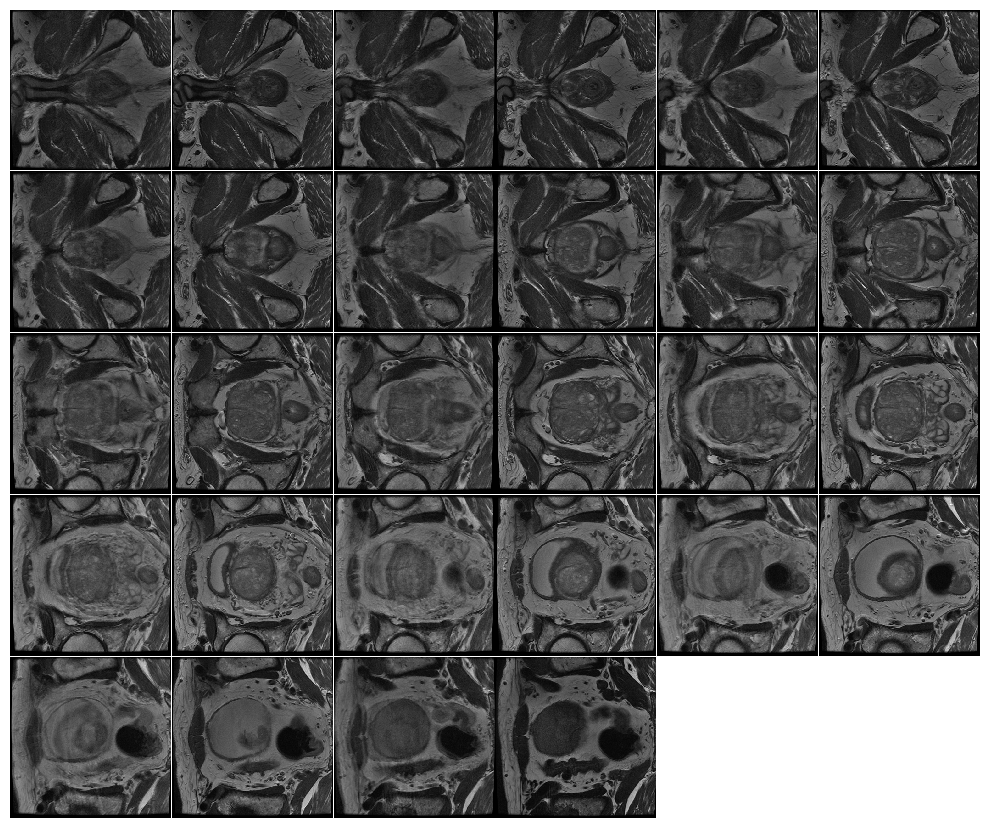

In [15]:
monai.visualize.matshow3d(t2w_image, cmap="gray",channel_dim=0,frame_dim=-1,show=True)
plt.show()

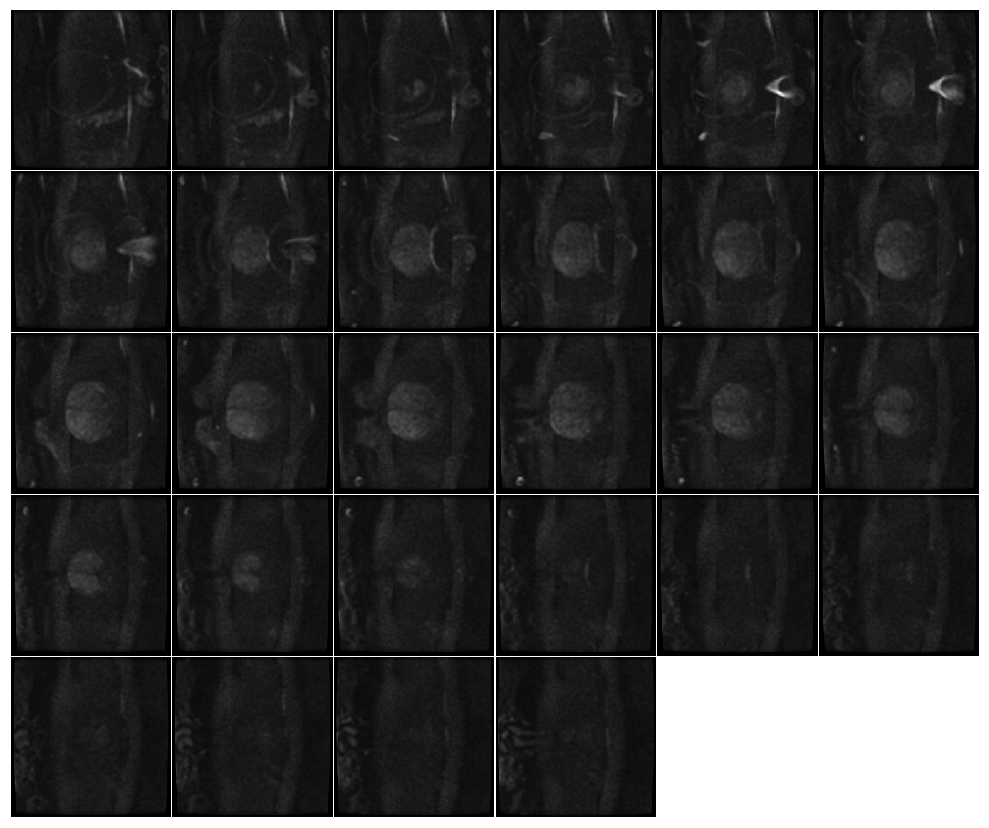

(<Figure size 1000x1000 with 1 Axes>,
 array([[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [nan]],
 
        ...,
 
        [[nan],
         [ 0.],
         [ 0.],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 0.],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]], dtype=float32))

In [16]:
monai.visualize.matshow3d(dwi_image[0:1], cmap="gray",channel_dim=0,frame_dim=-1,show=True)

In [19]:
association_list=[]
for i,row in t2w_axial.iterrows():
    subject = row['subject']
    session = row['session']

    sub_dwi_df = dwi_df[(dwi_df['subject'] == subject) & (dwi_df['session'] == session)].reset_index(drop=True)
    sub_adc_df = adc_df[(adc_df['subject'] == subject) & (adc_df['session'] == session)].reset_index(drop=True)
    association_list.append({'subject': subject, 'session': session, 'image_t2': row['image']})
    if not sub_dwi_df.empty:
        
        times=[]

        #adquisition_time_t2 = datetime.combine(datetime.min, row['AcquisitionTime'])
        t2w_image_path = os.path.join(path, t2w_df.subject[index], t2w_df.session[index],'mim-mr','anat', t2w_df.image[index])
        t2w_image = monai.transforms.LoadImage(ensure_channel_first=True)(t2w_image_path)
        #print(t2w_image.shape)
        image_t2_slices = t2w_image.shape[-1]
        images_dwi_dict ={}
        for i, dwi_row in sub_dwi_df.iterrows():
            dwi_image_path = os.path.join(path, dwi_row['subject'], dwi_row['session'],'mim-mr','dwi', dwi_row['image'])
            dwi_image = monai.transforms.LoadImage(ensure_channel_first=True)(dwi_image_path)
            #print(dwi_image.shape)
            image_dwi_slices = dwi_image.shape[-1]
            #adquisition_time_dwi = datetime.combine(datetime.min, dwi_row['AcquisitionTime'])
            #if abs(image_t2_slices - image_dwi_slices)<5:
                #times.append(abs(adquisition_time_t2-adquisition_time_dwi).total_seconds())
            bvalue = max(dwi_protocols[dwi_row['protocol_association']])
            images_dwi_dict.update({f'image_dwi_b{bvalue}': dwi_row['image']})


        #if times:
        association_list[-1].update(images_dwi_dict)
    
    if not sub_adc_df.empty:
        images_adc_dict ={}
        for i, adc_row in sub_adc_df.iterrows():

            if 'derivative' in adc_row['modality']:

                adc_image_path = os.path.join(derivatives_path, adc_row['subject'], adc_row['session'],'mim-mr','dwi', adc_row['image'])
                adc_image = monai.transforms.LoadImage(ensure_channel_first=True)(adc_image_path)
                image_adc_slices = adc_image.shape[-1]
                #adquisition_time_adc = datetime.combine(datetime.min, adc_row['AcquisitionTime'])
                if abs(image_t2_slices - image_adc_slices)<5:
                    bvalue = max(adc_row['bvalues']) if isinstance(adc_row['bvalues'],list) else 0
                    images_adc_dict.update({f'image_adc_b{bvalue}': adc_row['image'], f'adc_b{bvalue}_derivative': True})
            else:
                adc_image_path = os.path.join(path, adc_row['subject'], adc_row['session'],'mim-mr','dwi', adc_row['image'])
                adc_image = monai.transforms.LoadImage(ensure_channel_first=True)(adc_image_path)
                image_adc_slices = adc_image.shape[-1]
                #adquisition_time_adc = datetime.combine(datetime.min, adc_row['AcquisitionTime'])
                #if abs(image_t2_slices - image_adc_slices)<5:
                bvalue = max(adc_row['bvalues']) if isinstance(adc_row['bvalues'],list) else 0
                images_adc_dict.update({f'image_adc_b{bvalue}': adc_row['image'], f'adc_b{bvalue}_derivative': False})

        association_list[-1].update(images_adc_dict)

    # if i==3:
    #     break

association_df = pd.DataFrame(association_list)
association_df = association_df.sort_index(axis=1,ascending=False)

In [20]:
association_df

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
2    sub-000066  ses-000066   
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
..          ...         ...   
237  sub-000092  ses-000092   
238  sub-000092  ses-000092   
239  sub-000003  ses-000003   
240  sub-000111  ses-000111   
241  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-8_bp-prostat...   
1    sub-000063_ses-000063_acq-fse_run-6_bp-prostat...   
2    sub-000066_ses-000066_acq-fse_run-8_bp-prostat...   
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
..                                                 ...   
237  sub-000092_ses-000092_acq-fse_run-8_bp-prostat...   
238  sub-000092_ses-000092_acq-fse_run-13_bp-prosta...   
239  sub-000003_ses-000003_acq-fse_run-10_bp-arm_vp...   
240  sub-000111_ses-000111_acq-fse_run-8_bp-abdomen...   
241  sub-000120_ses-000120_acq-fse_run-8_bp-abdomen...   

                                        image_dwi_b800 image_dwi_b2000  \
0                                                  NaN             NaN   
1                                                  NaN             NaN   
2                                                  NaN             NaN   
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...             NaN   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...             NaN   
..                                                 ...             ...   
237                                                NaN             NaN   
238                                                NaN             NaN   
239                                                NaN             NaN   
240                                                NaN             NaN   
241                                                NaN             NaN   

    image_dwi_b1800                                    image_dwi_b1500  \
0               NaN  sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
1               NaN  sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
2               NaN  sub-000066_ses-000066_acq-bvalue_run-11_bp-pro...   
3               NaN                                                NaN   
4               NaN                                                NaN   
..              ...                                                ...   
237             NaN  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...   
238             NaN  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...   
239             NaN  sub-000003_ses-000003_acq-bvalue_run-12_bp-arm...   
240             NaN  sub-000111_ses-000111_acq-bvalue_run-11_bp-abd...   
241             NaN  sub-000120_ses-000120_acq-bvalue_run-11_bp-abd...   

                                       image_dwi_b1000 image_adc_b800  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...            NaN   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...            NaN   
2    sub-000066_ses-000066_acq-bvalue_run-10_bp-pro...            NaN   
3                                                  NaN            NaN   
4                                                  NaN            NaN   
..                                                 ...            ...   
237  sub-000092_ses-000092_acq-bvalue_run-14_bp-pro...            NaN   
238  sub-000092_ses-000092_acq-bvalue_run-14_bp-pro...            NaN   
239                                                NaN            NaN   
240  sub-000111_ses-000111_acq-bvalue_run-10_bp-abd...            NaN   
241  sub-000120_ses-000120_acq-bvalue_run-10_bp-abd...            NaN   

    image_adc_b2000                                    image_adc_b1500  \
0               NaN  sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
1               NaN  sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
2               NaN                                          

In [21]:
adc_row = association_df[association_df.image_adc_b0.isnull() == False].reset_index(drop=True).iloc[0]
adc_image_path = os.path.join(path, adc_row['subject'], adc_row['session'],'mim-mr','dwi', adc_row['image_adc_b0'])


In [22]:
association_df[association_df.image_adc_b0.isnull() == False]

subject     session  \
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
5    sub-000184  ses-000184   
6    sub-000179  ses-000179   
8    sub-000176  ses-000176   
..          ...         ...   
226  sub-000128  ses-000128   
227  sub-000128  ses-000128   
234  sub-000173  ses-000173   
235  sub-000173  ses-000173   
236  sub-000173  ses-000173   

                                              image_t2  \
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
5    sub-000184_ses-000184_acq-propeller_run-300_bp...   
6    sub-000179_ses-000179_acq-fse_run-501_bp-prost...   
8    sub-000176_ses-000176_acq-propeller_run-800_bp...   
..                                                 ...   
226  sub-000128_ses-000128_acq-fse_run-12001_bp-pro...   
227  sub-000128_ses-000128_acq-blade_run-9001_bp-pr...   
234  sub-000173_ses-000173_acq-propeller_run-700_bp...   
235  sub-000173_ses-000173_acq-propeller_run-7_bp-a...   
236  sub-000173_ses-000173_acq-propeller_run-4_bp-a...   

                                        image_dwi_b800  \
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
5    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
6                                                  NaN   
8    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
..                                                 ...   
226  sub-000128_ses-000128_acq-bvalue_run-17001_bp-...   
227  sub-000128_ses-000128_acq-bvalue_run-17001_bp-...   
234  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   
235  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   
236  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   

                                       image_dwi_b2000 image_dwi_b1800  \
3                                                  NaN             NaN   
4                                                  NaN             NaN   
5                                                  NaN             NaN   
6    sub-000179_ses-000179_acq-bvalue_run-701_bp-pr...             NaN   
8                                                  NaN             NaN   
..                                                 ...             ...   
226                                                NaN             NaN   
227                                                NaN             NaN   
234                                                NaN             NaN   
235                                                NaN             NaN   
236                                                NaN             NaN   

    image_dwi_b1500 image_dwi_b1000  \
3               NaN             NaN   
4               NaN             NaN   
5               NaN             NaN   
6               NaN             NaN   
8               NaN             NaN   
..              ...             ...   
226             NaN             NaN   
227             NaN             NaN   
234             NaN             NaN   
235             NaN             NaN   
236             NaN             NaN   

                                        image_adc_b800 image_adc_b2000  \
3                                                  NaN             NaN   
4                                                  NaN             NaN   
5                                                  NaN             NaN   
6                                                  NaN             NaN   
8                                                  NaN             NaN   
..                                                 ...             ...   
226                                                NaN             NaN   
227                                                NaN             NaN   
234  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...             NaN   
235  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...             NaN   
236  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...             Na

In [23]:
association_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               242 non-null    object
 1   session               242 non-null    object
 2   image_t2              242 non-null    object
 3   image_dwi_b800        83 non-null     object
 4   image_dwi_b2000       9 non-null      object
 5   image_dwi_b1800       1 non-null      object
 6   image_dwi_b1500       130 non-null    object
 7   image_dwi_b1000       129 non-null    object
 8   image_adc_b800        22 non-null     object
 9   image_adc_b2000       7 non-null      object
 10  image_adc_b1500       105 non-null    object
 11  image_adc_b1000       96 non-null     object
 12  image_adc_b0          96 non-null     object
 13  adc_b800_derivative   22 non-null     object
 14  adc_b2000_derivative  7 non-null      object
 15  adc_b1500_derivative  105 non-null    ob

## Add Clinical Variables

In [24]:
validation = pd.read_csv('Prostate_Cancer_TFM/Files/Own_data/Validation_Clinical_Variables.tsv',sep='\t')
validation['subject_mids'] = validation['label_subject'].apply(lambda x: f"sub-{x:06d}")
validation['session_mids'] = validation['label_session'].apply(lambda x: f"ses-{x:06d}")

In [25]:
validation

project   dep      CRC  label_subject  label_session    ED  AF   TB  TR  \
0    p0042021   7.0  90400.0              1              1  77.0 NaN  1.0 NaN   
1    p0042021   2.0   1503.0              2              2  57.0 NaN  NaN NaN   
2    p0042021   7.0  90400.0              3              3  68.0 NaN  2.0 NaN   
3    p0042021   7.0  90400.0              4              4  51.0 NaN  2.0 NaN   
4    p0042021   7.0  90400.0              5              5  71.0 NaN  NaN NaN   
..        ...   ...      ...            ...            ...   ...  ..  ...  ..   
187  p0042021   2.0   1503.0            188            188  63.0 NaN  NaN NaN   
188  p0042021   5.0    977.0            189            189  77.0 NaN  NaN NaN   
189  p0042021   2.0   1503.0            190            190  76.0 NaN  NaN NaN   
190  p0042021  17.0   1234.0            191            191  66.0 NaN  NaN NaN   
191  p0042021   2.0   1503.0            192            192  65.0 NaN  NaN NaN   

       PSA  ...  csPC  F_nacimiento        F_RM F_TACTO_RECTAL       F_PSA  \
0    5.040  ...   0.0    1934-10-02  2012-07-04            NaN  2012-02-19   
1      NaN  ...   1.0    1958-08-10  2015-10-18            NaN         NaN   
2    2.320  ...   1.0    1945-01-02  2014-03-07            NaN  2014-01-24   
3    0.098  ...   0.0    1964-08-13  2017-03-24            NaN  2017-02-21   
4      NaN  ...   NaN    1944-02-16  2015-06-13            NaN         NaN   
..     ...  ...   ...           ...         ...            ...         ...   
187    NaN  ...   NaN    1950-11-21  2014-11-20            NaN         NaN   
188  4.520  ...   1.0    1933-07-14  2010-09-30            NaN  2010-07-04   
189    NaN  ...   0.0    1938-11-04  2014-12-11            NaN         NaN   
190  6.060  ...   0.0    1948-06-18  2015-04-12            NaN  2015-03-28   
191    NaN  ...   1.0    1951-11-20  2017-02-15            NaN         NaN   

         F_csPC Time_diff_TB VP_segmentation subject_mids  session_mids  
0    2012-12-12   2012-03-11             NaN   sub-000001    ses-000001  
1    2017-07-20          NaN             NaN   sub-000002    ses-000002  
2    2014-05-16   2013-12-29        0.000000   sub-000003    ses-000003  
3    2017-06-22   2016-03-17        0.000000   sub-000004    ses-000004  
4           NaN          NaN        0.020508   sub-000005    ses-000005  
..          ...          ...             ...          ...           ...  
187         NaN          NaN             NaN   sub-000188    ses-000188  
188  2011-03-19          NaN       24.695920   sub-000189    ses-000189  
189  2014-12-21          NaN             NaN   sub-000190    ses-000190  
190  2019-01-26          NaN       30.268736   sub-000191    ses-000191  
191  2017-04-08          NaN             NaN   sub-000192    ses-000192  

[192 rows x 22 columns]

In [26]:
# Merge dataframes on specified columns
complete_df = pd.merge(association_df, validation, right_on=['subject_mids', 'session_mids'], left_on=['subject', 'session'])

# Drop specified columns
columns_to_drop = ['label_subject', 'label_session', 'Time_diff_TB', 'subject_mids', 'session_mids', 'project', 'CRC','F_TACTO_RECTAL','F_PSA','F_csPC']
complete_df = complete_df.drop(columns=columns_to_drop)

In [27]:
complete_df

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
2    sub-000066  ses-000066   
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
..          ...         ...   
235  sub-000092  ses-000092   
236  sub-000092  ses-000092   
237  sub-000003  ses-000003   
238  sub-000111  ses-000111   
239  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-8_bp-prostat...   
1    sub-000063_ses-000063_acq-fse_run-6_bp-prostat...   
2    sub-000066_ses-000066_acq-fse_run-8_bp-prostat...   
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
..                                                 ...   
235  sub-000092_ses-000092_acq-fse_run-8_bp-prostat...   
236  sub-000092_ses-000092_acq-fse_run-13_bp-prosta...   
237  sub-000003_ses-000003_acq-fse_run-10_bp-arm_vp...   
238  sub-000111_ses-000111_acq-fse_run-8_bp-abdomen...   
239  sub-000120_ses-000120_acq-fse_run-8_bp-abdomen...   

                                        image_dwi_b800 image_dwi_b2000  \
0                                                  NaN             NaN   
1                                                  NaN             NaN   
2                                                  NaN             NaN   
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...             NaN   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...             NaN   
..                                                 ...             ...   
235                                                NaN             NaN   
236                                                NaN             NaN   
237                                                NaN             NaN   
238                                                NaN             NaN   
239                                                NaN             NaN   

    image_dwi_b1800                                    image_dwi_b1500  \
0               NaN  sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
1               NaN  sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
2               NaN  sub-000066_ses-000066_acq-bvalue_run-11_bp-pro...   
3               NaN                                                NaN   
4               NaN                                                NaN   
..              ...                                                ...   
235             NaN  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...   
236             NaN  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...   
237             NaN  sub-000003_ses-000003_acq-bvalue_run-12_bp-arm...   
238             NaN  sub-000111_ses-000111_acq-bvalue_run-11_bp-abd...   
239             NaN  sub-000120_ses-000120_acq-bvalue_run-11_bp-abd...   

                                       image_dwi_b1000 image_adc_b800  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...            NaN   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...            NaN   
2    sub-000066_ses-000066_acq-bvalue_run-10_bp-pro...            NaN   
3                                                  NaN            NaN   
4                                                  NaN            NaN   
..                                                 ...            ...   
235  sub-000092_ses-000092_acq-bvalue_run-14_bp-pro...            NaN   
236  sub-000092_ses-000092_acq-bvalue_run-14_bp-pro...            NaN   
237                                                NaN            NaN   
238  sub-000111_ses-000111_acq-bvalue_run-10_bp-abd...            NaN   
239  sub-000120_ses-000120_acq-bvalue_run-10_bp-abd...            NaN   

    image_adc_b2000  ...  AF   TB  TR   PSA          VP  PIR csPC  \
0               NaN  ... NaN  3.0 NaN   NaN  105.698736  3.0  0.0   
1               NaN  ... NaN  3.0 NaN   NaN  105.698736  3.0  0.0   
2               NaN  ... NaN  NaN NaN  9.51         NaN  NaN  0.0   
3      

In [28]:
complete_df.columns

Index(['subject', 'session', 'image_t2', 'image_dwi_b800', 'image_dwi_b2000',
       'image_dwi_b1800', 'image_dwi_b1500', 'image_dwi_b1000',
       'image_adc_b800', 'image_adc_b2000', 'image_adc_b1500',
       'image_adc_b1000', 'image_adc_b0', 'adc_b800_derivative',
       'adc_b2000_derivative', 'adc_b1500_derivative', 'adc_b1000_derivative',
       'adc_b0_derivative', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR',
       'csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation'],
      dtype='object')

In [29]:
complete_df.loc[~complete_df["image_adc_b0"].isna()][['subject', 'session', 'image_t2', 'image_dwi_b800', 'image_dwi_b2000',
       'image_dwi_b1800', 'image_dwi_b1500', 'image_dwi_b1000',
       'image_adc_b2000', 'image_adc_b1500', 'image_adc_b1000', 'image_adc_b0']]

subject     session  \
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
5    sub-000184  ses-000184   
6    sub-000179  ses-000179   
8    sub-000176  ses-000176   
..          ...         ...   
224  sub-000128  ses-000128   
225  sub-000128  ses-000128   
232  sub-000173  ses-000173   
233  sub-000173  ses-000173   
234  sub-000173  ses-000173   

                                              image_t2  \
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
5    sub-000184_ses-000184_acq-propeller_run-300_bp...   
6    sub-000179_ses-000179_acq-fse_run-501_bp-prost...   
8    sub-000176_ses-000176_acq-propeller_run-800_bp...   
..                                                 ...   
224  sub-000128_ses-000128_acq-fse_run-12001_bp-pro...   
225  sub-000128_ses-000128_acq-blade_run-9001_bp-pr...   
232  sub-000173_ses-000173_acq-propeller_run-700_bp...   
233  sub-000173_ses-000173_acq-propeller_run-7_bp-a...   
234  sub-000173_ses-000173_acq-propeller_run-4_bp-a...   

                                        image_dwi_b800  \
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
5    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
6                                                  NaN   
8    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
..                                                 ...   
224  sub-000128_ses-000128_acq-bvalue_run-17001_bp-...   
225  sub-000128_ses-000128_acq-bvalue_run-17001_bp-...   
232  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   
233  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   
234  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   

                                       image_dwi_b2000 image_dwi_b1800  \
3                                                  NaN             NaN   
4                                                  NaN             NaN   
5                                                  NaN             NaN   
6    sub-000179_ses-000179_acq-bvalue_run-701_bp-pr...             NaN   
8                                                  NaN             NaN   
..                                                 ...             ...   
224                                                NaN             NaN   
225                                                NaN             NaN   
232                                                NaN             NaN   
233                                                NaN             NaN   
234                                                NaN             NaN   

    image_dwi_b1500 image_dwi_b1000 image_adc_b2000 image_adc_b1500  \
3               NaN             NaN             NaN             NaN   
4               NaN             NaN             NaN             NaN   
5               NaN             NaN             NaN             NaN   
6               NaN             NaN             NaN             NaN   
8               NaN             NaN             NaN             NaN   
..              ...             ...             ...             ...   
224             NaN             NaN             NaN             NaN   
225             NaN             NaN             NaN             NaN   
232             NaN             NaN             NaN             NaN   
233             NaN             NaN             NaN             NaN   
234             NaN             NaN             NaN             NaN   

    image_adc_b1000                                       image_adc_b0  
3               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  
4               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  
5               NaN  sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  
6               NaN  sub-000179_ses-000179_acq-adc_run-703_bp-prost...  
8               NaN  sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  
..              ...                                          

## Check Images Associated

In [30]:
img_columns = ['t2','dwi','adc']

transforms = monai.transforms.Compose([
    monai.transforms.LoadImaged(keys=img_columns, image_only=True,ensure_channel_first=True),
    monai.transforms.DataStatsd(keys=img_columns,),
    monai.transforms.ResampleToMatchd(
        keys=["adc", "dwi"],
        key_dst="t2",
        mode=("bilinear", "bilinear"),
    ),
    monai.transforms.SplitDimd(
        keys=["dwi"],
        keepdim=True,
    ),
    # Resample images to t2 dimension
    # monai.transforms.Resized(
    #     keys=img_columns,
    #     spatial_size=eval(input_shape),
    #     mode=("trilinear", "trilinear", "trilinear", "nearest"),
    # ),  # SAMUNETR: Reshape to have the same dimension
    monai.transforms.ScaleIntensityd(keys=['t2','dwi_0','dwi_1','adc'], minv=0.0, maxv=1.0, allow_missing_keys=True),
    # monai.transforms.NormalizeIntensityd(keys=img_columns),
    monai.transforms.ConcatItemsd(keys=['t2','dwi_0','adc'], name="image", dim=0),
])

In [36]:
index=224
images_dict = {
    't2': os.path.join(path,complete_df.subject[index], complete_df.session[index],'mim-mr','anat', complete_df.image_t2[index]),
    'dwi': os.path.join(path,complete_df.subject[index], complete_df.session[index],'mim-mr','dwi', complete_df.image_dwi_b800[index]),
    'adc': os.path.join(derivatives_path,complete_df.subject[index], complete_df.session[index],'mim-mr','dwi', complete_df.image_adc_b0[index]) if complete_df.adc_b0_derivative[index] else os.path.join(path,complete_df.subject[index], complete_df.session[index],'mim-mr','dwi', complete_df.image_adc_b0[index])
    }

In [37]:
images = transforms(images_dict)

Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([1, 384, 384, 27])
Value range: (0.0, 691.0)
Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([1, 268, 216, 50])
Value range: (0.0, 4095.0)
Data statistics:
Type: <class 'monai.data.meta_tensor.MetaTensor'> torch.float32
Shape: torch.Size([1, 150, 76, 27])
Value range: (0.0, 2822.0)


In [39]:
print("T2w shape: ", images['t2'].shape)
print("DWI shape: ", images['dwi_0'].shape)
print("ADC shape: ", images['adc'].shape)
print("Concat shape: ", images['image'].shape)

T2w shape:  torch.Size([1, 384, 384, 27])
DWI shape:  torch.Size([1, 384, 384, 27])
ADC shape:  torch.Size([1, 384, 384, 27])
Concat shape:  torch.Size([3, 384, 384, 27])


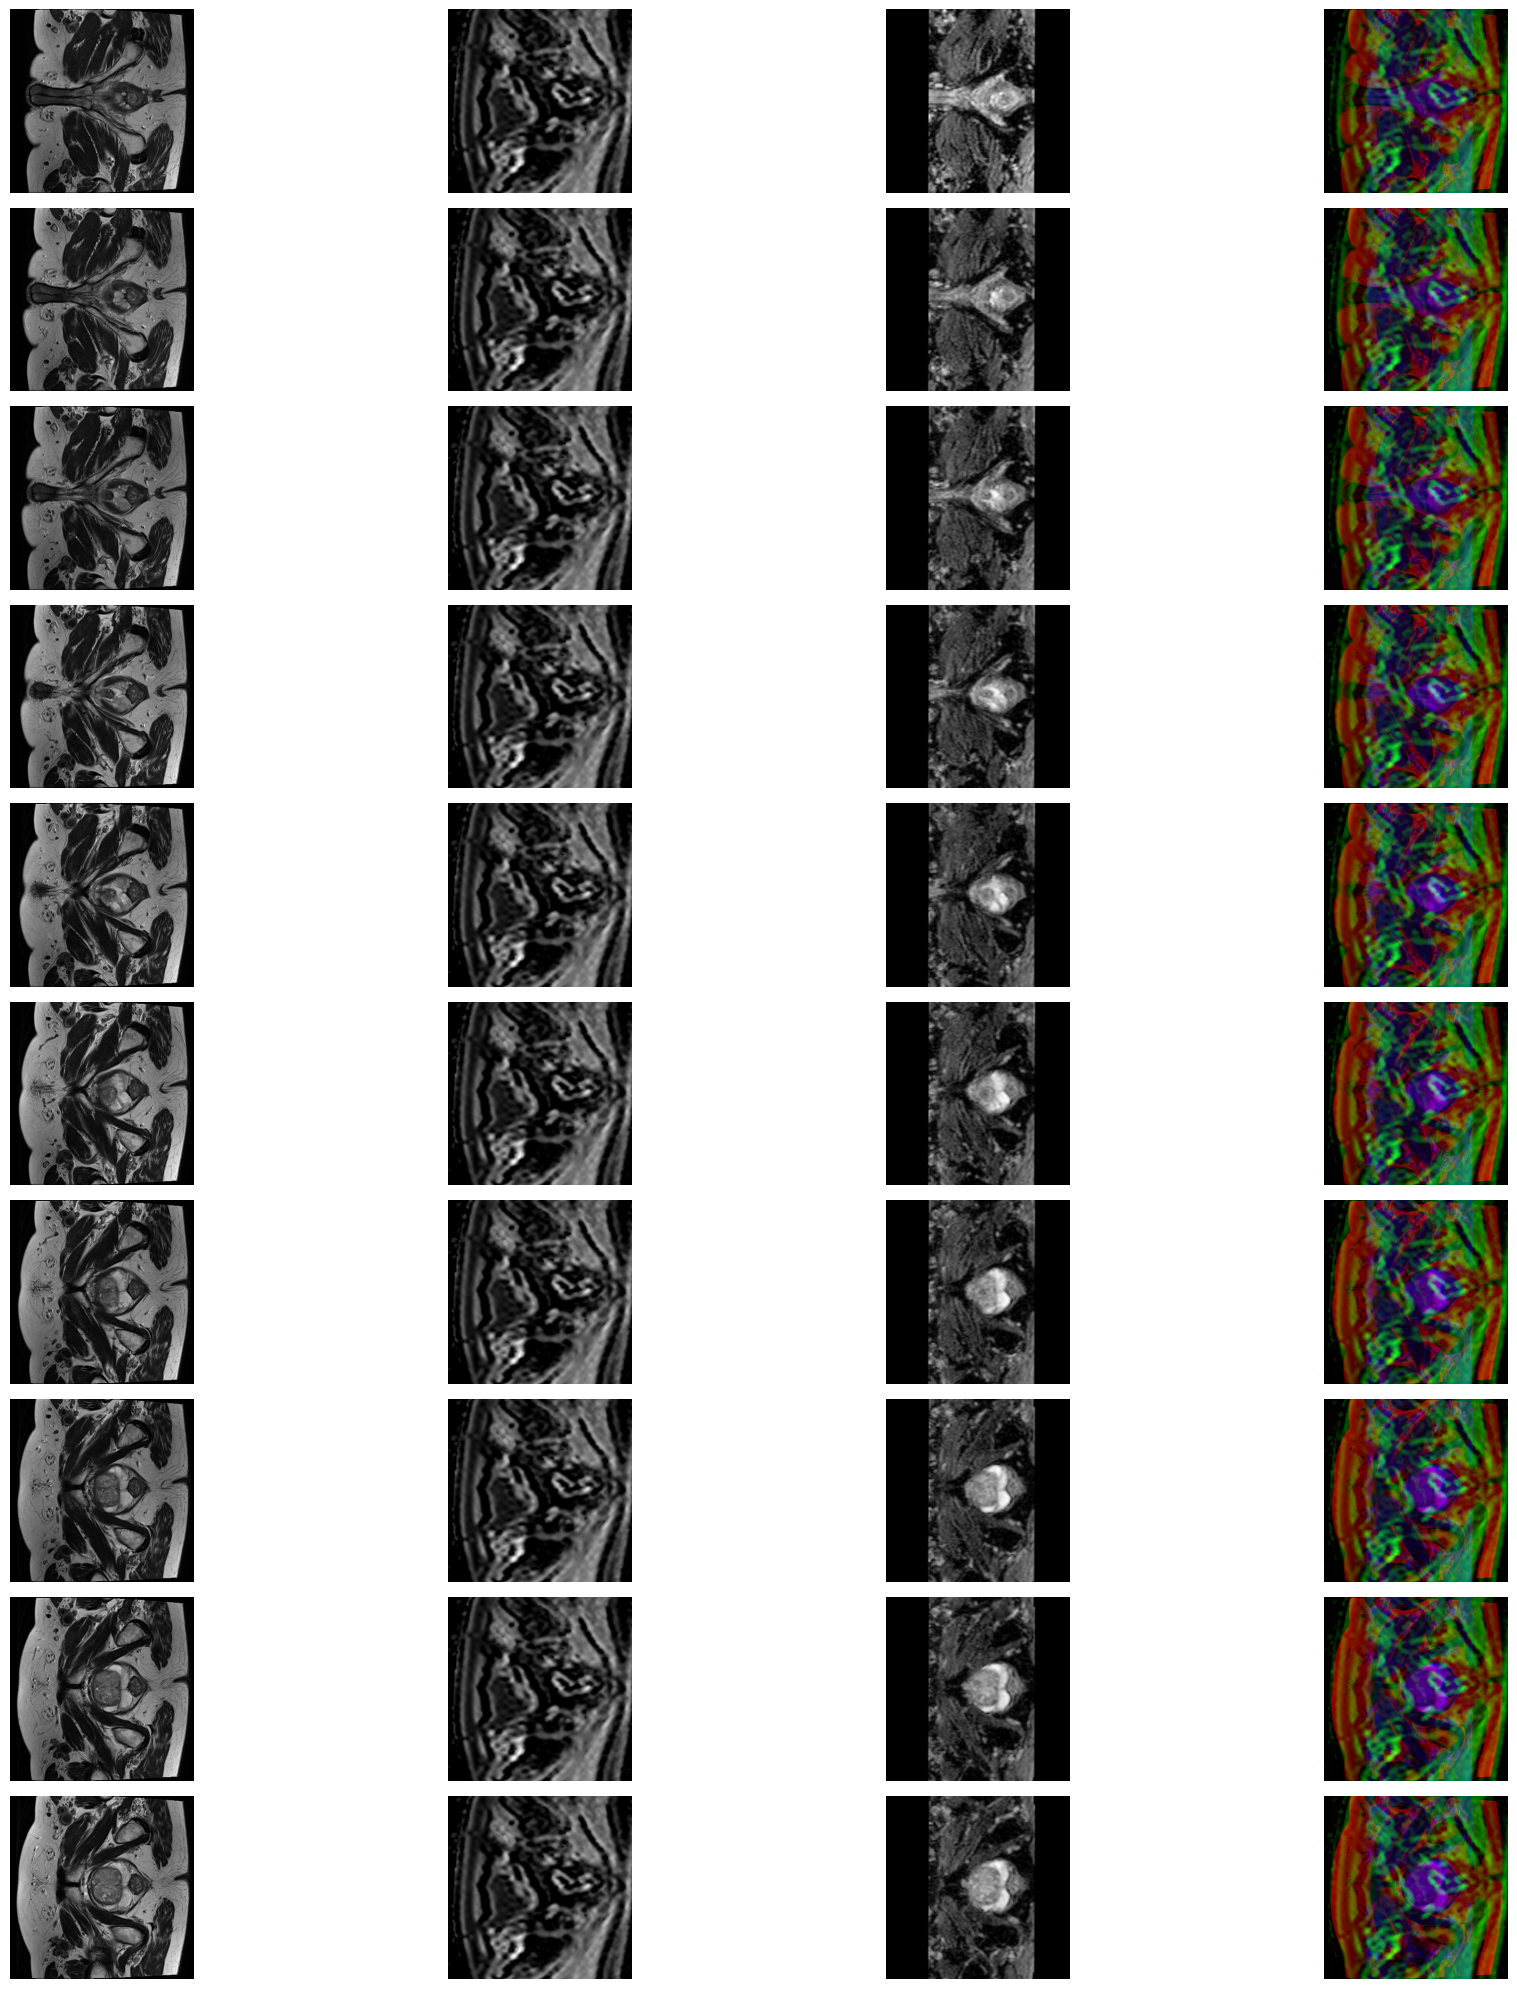

In [40]:
n_rows = 10
fig, axs = plt.subplots(n_rows, 4, figsize=(20,20))
for i in range(n_rows):
    axs[i,0].imshow(images['t2'][0,:,:,i], cmap='gray')
    axs[i,0].axis("off")
    axs[i,1].imshow(images['dwi_0'][0,:,:,i], cmap='gray')
    axs[i,1].axis("off")
    axs[i,2].imshow(images['adc'][0,:,:,i], cmap='gray')
    axs[i,2].axis("off")
    axs[i,3].imshow(images['image'][:,:,:,i].permute(1,2,0), cmap='gray')
    axs[i,3].axis("off")
fig.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

In [41]:
complete_df.to_csv('Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Validation.csv',index=False)

## Divide tables for training

In [42]:
complete_df = pd.read_csv("Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Validation.csv")
complete_df

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
2    sub-000066  ses-000066   
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
..          ...         ...   
235  sub-000092  ses-000092   
236  sub-000092  ses-000092   
237  sub-000003  ses-000003   
238  sub-000111  ses-000111   
239  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-8_bp-prostat...   
1    sub-000063_ses-000063_acq-fse_run-6_bp-prostat...   
2    sub-000066_ses-000066_acq-fse_run-8_bp-prostat...   
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
..                                                 ...   
235  sub-000092_ses-000092_acq-fse_run-8_bp-prostat...   
236  sub-000092_ses-000092_acq-fse_run-13_bp-prosta...   
237  sub-000003_ses-000003_acq-fse_run-10_bp-arm_vp...   
238  sub-000111_ses-000111_acq-fse_run-8_bp-abdomen...   
239  sub-000120_ses-000120_acq-fse_run-8_bp-abdomen...   

                                        image_dwi_b800 image_dwi_b2000  \
0                                                  NaN             NaN   
1                                                  NaN             NaN   
2                                                  NaN             NaN   
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...             NaN   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...             NaN   
..                                                 ...             ...   
235                                                NaN             NaN   
236                                                NaN             NaN   
237                                                NaN             NaN   
238                                                NaN             NaN   
239                                                NaN             NaN   

    image_dwi_b1800                                    image_dwi_b1500  \
0               NaN  sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
1               NaN  sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
2               NaN  sub-000066_ses-000066_acq-bvalue_run-11_bp-pro...   
3               NaN                                                NaN   
4               NaN                                                NaN   
..              ...                                                ...   
235             NaN  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...   
236             NaN  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...   
237             NaN  sub-000003_ses-000003_acq-bvalue_run-12_bp-arm...   
238             NaN  sub-000111_ses-000111_acq-bvalue_run-11_bp-abd...   
239             NaN  sub-000120_ses-000120_acq-bvalue_run-11_bp-abd...   

                                       image_dwi_b1000 image_adc_b800  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...            NaN   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...            NaN   
2    sub-000066_ses-000066_acq-bvalue_run-10_bp-pro...            NaN   
3                                                  NaN            NaN   
4                                                  NaN            NaN   
..                                                 ...            ...   
235  sub-000092_ses-000092_acq-bvalue_run-14_bp-pro...            NaN   
236  sub-000092_ses-000092_acq-bvalue_run-14_bp-pro...            NaN   
237                                                NaN            NaN   
238  sub-000111_ses-000111_acq-bvalue_run-10_bp-abd...            NaN   
239  sub-000120_ses-000120_acq-bvalue_run-10_bp-abd...            NaN   

    image_adc_b2000  ...  AF   TB  TR   PSA          VP  PIR csPC  \
0               NaN  ... NaN  3.0 NaN   NaN  105.698736  3.0  0.0   
1               NaN  ... NaN  3.0 NaN   NaN  105.698736  3.0  0.0   
2               NaN  ... NaN  NaN NaN  9.51         NaN  NaN  0.0   
3      

In [43]:
complete_df.columns

Index(['subject', 'session', 'image_t2', 'image_dwi_b800', 'image_dwi_b2000',
       'image_dwi_b1800', 'image_dwi_b1500', 'image_dwi_b1000',
       'image_adc_b800', 'image_adc_b2000', 'image_adc_b1500',
       'image_adc_b1000', 'image_adc_b0', 'adc_b800_derivative',
       'adc_b2000_derivative', 'adc_b1500_derivative', 'adc_b1000_derivative',
       'adc_b0_derivative', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR',
       'csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation'],
      dtype='object')

In [44]:
dwib800_adcb0 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b800', 'image_adc_b0', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib800_adcb0.dropna(subset=['image_dwi_b800', 'image_adc_b0'],inplace=True)
dwib800_adcb0.rename(columns={'image_dwi_b800': 'image_dwi', 'image_adc_b0': 'image_adc'},inplace=True)
dwib800_adcb0

subject     session  \
3    sub-000184  ses-000184   
4    sub-000184  ses-000184   
5    sub-000184  ses-000184   
8    sub-000176  ses-000176   
9    sub-000176  ses-000176   
..          ...         ...   
224  sub-000128  ses-000128   
225  sub-000128  ses-000128   
232  sub-000173  ses-000173   
233  sub-000173  ses-000173   
234  sub-000173  ses-000173   

                                              image_t2  \
3    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
4    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
5    sub-000184_ses-000184_acq-propeller_run-300_bp...   
8    sub-000176_ses-000176_acq-propeller_run-800_bp...   
9    sub-000176_ses-000176_acq-propeller_run-5_bp-a...   
..                                                 ...   
224  sub-000128_ses-000128_acq-fse_run-12001_bp-pro...   
225  sub-000128_ses-000128_acq-blade_run-9001_bp-pr...   
232  sub-000173_ses-000173_acq-propeller_run-700_bp...   
233  sub-000173_ses-000173_acq-propeller_run-7_bp-a...   
234  sub-000173_ses-000173_acq-propeller_run-4_bp-a...   

                                             image_dwi  \
3    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
4    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
5    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
8    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
9    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
..                                                 ...   
224  sub-000128_ses-000128_acq-bvalue_run-17001_bp-...   
225  sub-000128_ses-000128_acq-bvalue_run-17001_bp-...   
232  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   
233  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   
234  sub-000173_ses-000173_acq-bvalue_run-5_bp-abdo...   

                                             image_adc   dep    ED  AF   TB  \
3    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
4    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
5    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
8    sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  17.0  65.0 NaN  1.0   
9    sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  17.0  65.0 NaN  1.0   
..                                                 ...   ...   ...  ..  ...   
224  sub-000128_ses-000128_acq-adc_run-14001_bp-arm...   7.0  70.0 NaN  1.0   
225  sub-000128_ses-000128_acq-adc_run-14001_bp-arm...   7.0  70.0 NaN  1.0   
232  sub-000173_ses-000173_acq-adc_run-800_bp-abdom...  17.0  72.0 NaN  1.0   
233  sub-000173_ses-000173_acq-adc_run-800_bp-abdom...  17.0  72.0 NaN  1.0   
234  sub-000173_ses-000173_acq-adc_run-800_bp-abdom...  17.0  72.0 NaN  1.0   

     TR    PSA         VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
3   NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466  
4   NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466  
5   NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466  
8   NaN  10.08  56.570800  4.0   1.0   1945-10-25  2010-09-11        50.214745  
9   NaN  10.08  56.570800  4.0   1.0   1945-10-25  2010-09-11        50.214745  
..   ..    ...        ...  ...   ...          ...         ...              ...  
224 NaN   9.38  72.000000  3.0   0.0   1946-05-06  2018-03-02        73.724678  
225 NaN   9.38  72.000000  3.0   0.0   1946-05-06  2018-03-02        73.724678  
232 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346  
233 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346  
234 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346  

[83 rows x 17 columns]

In [45]:
dwib1000_adcb1000 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b1000', 'image_adc_b1000', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib1000_adcb1000.dropna(subset=['image_dwi_b1000', 'image_adc_b1000'],inplace=True)
dwib1000_adcb1000.rename(columns={'image_dwi_b1000': 'image_dwi', 'image_adc_b1000': 'image_adc'},inplace=True)
dwib1000_adcb1000

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
7    sub-000108  ses-000108   
11   sub-000103  ses-000103   
16   sub-000015  ses-000015   
..          ...         ...   
231  sub-000107  ses-000107   
235  sub-000092  ses-000092   
236  sub-000092  ses-000092   
238  sub-000111  ses-000111   
239  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-8_bp-prostat...   
1    sub-000063_ses-000063_acq-fse_run-6_bp-prostat...   
7    sub-000108_ses-000108_acq-fse_run-9_bp-arm_vp-...   
11   sub-000103_ses-000103_acq-fse_run-8_bp-abdomen...   
16   sub-000015_ses-000015_acq-fse_run-9_bp-prostat...   
..                                                 ...   
231  sub-000107_ses-000107_acq-fse_run-10_bp-arm_vp...   
235  sub-000092_ses-000092_acq-fse_run-8_bp-prostat...   
236  sub-000092_ses-000092_acq-fse_run-13_bp-prosta...   
238  sub-000111_ses-000111_acq-fse_run-8_bp-abdomen...   
239  sub-000120_ses-000120_acq-fse_run-8_bp-abdomen...   

                                             image_dwi  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...   
7    sub-000108_ses-000108_acq-bvalue_run-11_bp-arm...   
11   sub-000103_ses-000103_acq-bvalue_run-10_bp-abd...   
16   sub-000015_ses-000015_acq-bvalue_run-10_bp-pro...   
..                                                 ...   
231  sub-000107_ses-000107_acq-bvalue_run-12_bp-arm...   
235  sub-000092_ses-000092_acq-bvalue_run-14_bp-pro...   
236  sub-000092_ses-000092_acq-bvalue_run-14_bp-pro...   
238  sub-000111_ses-000111_acq-bvalue_run-10_bp-abd...   
239  sub-000120_ses-000120_acq-bvalue_run-10_bp-abd...   

                                             image_adc  dep    ED  AF   TB  \
0    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...  7.0  70.0 NaN  3.0   
1    sub-000063_ses-000063_acq-bvalue_run-13_bp-pro...  7.0  70.0 NaN  3.0   
7    sub-000108_ses-000108_acq-bvalue_run-11_bp-arm...  7.0  74.0 NaN  NaN   
11   sub-000103_ses-000103_acq-bvalue_run-10_bp-abd...  7.0  67.0 NaN  NaN   
16   sub-000015_ses-000015_acq-bvalue_run-10_bp-pro...  7.0  70.0 NaN  NaN   
..                                                 ...  ...   ...  ..  ...   
231  sub-000107_ses-000107_acq-bvalue_run-12_bp-arm...  7.0  56.0 NaN  2.0   
235  sub-000092_ses-000092_acq-bvalue_run-10_bp-pro...  7.0  69.0 NaN  2.0   
236  sub-000092_ses-000092_acq-bvalue_run-10_bp-pro...  7.0  69.0 NaN  2.0   
238  sub-000111_ses-000111_acq-bvalue_run-10_bp-abd...  7.0  62.0 NaN  NaN   
239  sub-000120_ses-000120_acq-bvalue_run-10_bp-abd...  7.0  69.0 NaN  1.0   

     TR   PSA          VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
0   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
1   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
7   NaN   NaN   99.000000  NaN   0.0   1941-10-09  2016-03-27        66.821191  
11  NaN   NaN  115.596000  5.0   NaN   1948-12-04  2015-12-05       123.743555  
16  NaN   NaN         NaN  NaN   NaN   1945-07-24  2016-02-18        28.519533  
..   ..   ...         ...  ...   ...          ...         ...              ...  
231 NaN  6.98         NaN  NaN   1.0   1958-07-21  2015-04-02        27.749707  
235 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
236 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
238 NaN   NaN   58.000000  4.0   1.0   1953-01-05  2015-06-24        44.452148  
239 NaN  5.84   34.000000  4.0   0.0   1945-06-17  2014-09-24        37.376660  

[96 rows x 17 columns]

In [46]:
dwib1500_adcb1500 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b1500', 'image_adc_b1500', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib1500_adcb1500.dropna(subset=['image_dwi_b1500', 'image_adc_b1500'],inplace=True)
dwib1500_adcb1500.rename(columns={'image_dwi_b1500': 'image_dwi', 'image_adc_b1500': 'image_adc'},inplace=True)
dwib1500_adcb1500

subject     session  \
0    sub-000063  ses-000063   
1    sub-000063  ses-000063   
7    sub-000108  ses-000108   
11   sub-000103  ses-000103   
16   sub-000015  ses-000015   
..          ...         ...   
235  sub-000092  ses-000092   
236  sub-000092  ses-000092   
237  sub-000003  ses-000003   
238  sub-000111  ses-000111   
239  sub-000120  ses-000120   

                                              image_t2  \
0    sub-000063_ses-000063_acq-fse_run-8_bp-prostat...   
1    sub-000063_ses-000063_acq-fse_run-6_bp-prostat...   
7    sub-000108_ses-000108_acq-fse_run-9_bp-arm_vp-...   
11   sub-000103_ses-000103_acq-fse_run-8_bp-abdomen...   
16   sub-000015_ses-000015_acq-fse_run-9_bp-prostat...   
..                                                 ...   
235  sub-000092_ses-000092_acq-fse_run-8_bp-prostat...   
236  sub-000092_ses-000092_acq-fse_run-13_bp-prosta...   
237  sub-000003_ses-000003_acq-fse_run-10_bp-arm_vp...   
238  sub-000111_ses-000111_acq-fse_run-8_bp-abdomen...   
239  sub-000120_ses-000120_acq-fse_run-8_bp-abdomen...   

                                             image_dwi  \
0    sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...   
7    sub-000108_ses-000108_acq-bvalue_run-12_bp-arm...   
11   sub-000103_ses-000103_acq-bvalue_run-11_bp-abd...   
16   sub-000015_ses-000015_acq-bvalue_run-11_bp-pro...   
..                                                 ...   
235  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...   
236  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...   
237  sub-000003_ses-000003_acq-bvalue_run-12_bp-arm...   
238  sub-000111_ses-000111_acq-bvalue_run-11_bp-abd...   
239  sub-000120_ses-000120_acq-bvalue_run-11_bp-abd...   

                                             image_adc  dep    ED  AF   TB  \
0    sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...  7.0  70.0 NaN  3.0   
1    sub-000063_ses-000063_acq-bvalue_run-14_bp-pro...  7.0  70.0 NaN  3.0   
7    sub-000108_ses-000108_acq-bvalue_run-12_bp-arm...  7.0  74.0 NaN  NaN   
11   sub-000103_ses-000103_acq-bvalue_run-11_bp-abd...  7.0  67.0 NaN  NaN   
16   sub-000015_ses-000015_acq-bvalue_run-11_bp-pro...  7.0  70.0 NaN  NaN   
..                                                 ...  ...   ...  ..  ...   
235  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...  7.0  69.0 NaN  2.0   
236  sub-000092_ses-000092_acq-bvalue_run-11_bp-pro...  7.0  69.0 NaN  2.0   
237  sub-000003_ses-000003_acq-bvalue_run-12_bp-arm...  7.0  68.0 NaN  2.0   
238  sub-000111_ses-000111_acq-bvalue_run-11_bp-abd...  7.0  62.0 NaN  NaN   
239  sub-000120_ses-000120_acq-bvalue_run-11_bp-abd...  7.0  69.0 NaN  1.0   

     TR   PSA          VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
0   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
1   NaN   NaN  105.698736  3.0   0.0   1947-04-05  2016-07-07       103.725293  
7   NaN   NaN   99.000000  NaN   0.0   1941-10-09  2016-03-27        66.821191  
11  NaN   NaN  115.596000  5.0   NaN   1948-12-04  2015-12-05       123.743555  
16  NaN   NaN         NaN  NaN   NaN   1945-07-24  2016-02-18        28.519533  
..   ..   ...         ...  ...   ...          ...         ...              ...  
235 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
236 NaN  7.24    0.520000  NaN   0.0   1945-10-31  2014-10-02       149.049316  
237 NaN  2.32         NaN  NaN   1.0   1945-01-02  2014-03-07         0.000000  
238 NaN   NaN   58.000000  4.0   1.0   1953-01-05  2015-06-24        44.452148  
239 NaN  5.84   34.000000  4.0   0.0   1945-06-17  2014-09-24        37.376660  

[105 rows x 17 columns]

In [47]:
dwib1800_adcb0 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b1800', 'image_adc_b0', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib1800_adcb0.dropna(subset=['image_dwi_b1800', 'image_adc_b0'],inplace=True)
dwib1800_adcb0.rename(columns={'image_dwi_b1800': 'image_dwi', 'image_adc_b0': 'image_adc'},inplace=True)
dwib1800_adcb0

Empty DataFrame
Columns: [subject, session, image_t2, image_dwi, image_adc, dep, ED, AF, TB, TR, PSA, VP, PIR, csPC, F_nacimiento, F_RM, VP_segmentation]
Index: []

In [48]:
dwib2000_adcb2000 = complete_df[['subject', 'session', 'image_t2', 'image_dwi_b2000', 'image_adc_b2000', 'dep', 'ED', 'AF', 'TB', 'TR', 'PSA', 'VP', 'PIR','csPC', 'F_nacimiento', 'F_RM', 'VP_segmentation']].copy()
dwib2000_adcb2000.dropna(subset=['image_dwi_b2000', 'image_adc_b2000'],inplace=True)
dwib2000_adcb2000.rename(columns={'image_dwi_b2000': 'image_dwi', 'image_adc_b2000': 'image_adc'},inplace=True)
dwib2000_adcb2000

subject     session  \
139  sub-000098  ses-000098   
140  sub-000098  ses-000098   
150  sub-000095  ses-000095   
182  sub-000040  ses-000040   
183  sub-000116  ses-000116   
184  sub-000116  ses-000116   
216  sub-000147  ses-000147   

                                              image_t2  \
139  sub-000098_ses-000098_acq-fse_run-16_bp-abdome...   
140  sub-000098_ses-000098_acq-fse_run-9_bp-abdomen...   
150  sub-000095_ses-000095_acq-fse_run-9_bp-prostat...   
182  sub-000040_ses-000040_acq-fse_run-9_bp-cervix_...   
183  sub-000116_ses-000116_acq-fse_run-14_bp-prosta...   
184  sub-000116_ses-000116_acq-fse_run-18_bp-prosta...   
216  sub-000147_ses-000147_acq-fse_run-9_bp-prostat...   

                                             image_dwi  \
139  sub-000098_ses-000098_acq-bvalue_run-12_bp-abd...   
140  sub-000098_ses-000098_acq-bvalue_run-12_bp-abd...   
150  sub-000095_ses-000095_acq-bvalue_run-10_bp-pro...   
182  sub-000040_ses-000040_acq-bvalue_run-12_bp-cer...   
183  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   
184  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   
216  sub-000147_ses-000147_acq-bvalue_run-10_bp-pro...   

                                             image_adc  dep    ED  AF   TB  \
139  sub-000098_ses-000098_acq-bvalue_run-10_bp-abd...  7.0  50.0 NaN  NaN   
140  sub-000098_ses-000098_acq-bvalue_run-10_bp-abd...  7.0  50.0 NaN  NaN   
150  sub-000095_ses-000095_acq-bvalue_run-10_bp-pro...  7.0  71.0 NaN  NaN   
182  sub-000040_ses-000040_acq-bvalue_run-12_bp-cer...  7.0  60.0 NaN  NaN   
183  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...  7.0  82.0 NaN  NaN   
184  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...  7.0  82.0 NaN  NaN   
216  sub-000147_ses-000147_acq-bvalue_run-10_bp-pro...  7.0  73.0 NaN  2.0   

     TR    PSA    VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
139 NaN    NaN  77.2  5.0   0.5   1959-11-17  2010-10-09        65.647119  
140 NaN    NaN  77.2  5.0   0.5   1959-11-17  2010-10-09        65.647119  
150 NaN    NaN  65.0  NaN   0.0   1943-04-14  2014-12-09        62.103212  
182 NaN    NaN   NaN  NaN   NaN   1956-11-22  2017-08-05       129.585059  
183 NaN  40.57   NaN  5.0   1.0   1931-11-19  2014-07-28        37.088379  
184 NaN  40.57   NaN  5.0   1.0   1931-11-19  2014-07-28        37.088379  
216 NaN  31.78  40.0  NaN   1.0   1943-10-27  2017-04-21        32.506055

In [49]:
unified_complete_df = pd.concat([dwib800_adcb0, dwib1000_adcb1000, dwib1500_adcb1500, dwib2000_adcb2000],ignore_index=True)
unified_complete_df

subject     session  \
0    sub-000184  ses-000184   
1    sub-000184  ses-000184   
2    sub-000184  ses-000184   
3    sub-000176  ses-000176   
4    sub-000176  ses-000176   
..          ...         ...   
286  sub-000095  ses-000095   
287  sub-000040  ses-000040   
288  sub-000116  ses-000116   
289  sub-000116  ses-000116   
290  sub-000147  ses-000147   

                                              image_t2  \
0    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
1    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
2    sub-000184_ses-000184_acq-propeller_run-300_bp...   
3    sub-000176_ses-000176_acq-propeller_run-800_bp...   
4    sub-000176_ses-000176_acq-propeller_run-5_bp-a...   
..                                                 ...   
286  sub-000095_ses-000095_acq-fse_run-9_bp-prostat...   
287  sub-000040_ses-000040_acq-fse_run-9_bp-cervix_...   
288  sub-000116_ses-000116_acq-fse_run-14_bp-prosta...   
289  sub-000116_ses-000116_acq-fse_run-18_bp-prosta...   
290  sub-000147_ses-000147_acq-fse_run-9_bp-prostat...   

                                             image_dwi  \
0    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
1    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
2    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
3    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
4    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
..                                                 ...   
286  sub-000095_ses-000095_acq-bvalue_run-10_bp-pro...   
287  sub-000040_ses-000040_acq-bvalue_run-12_bp-cer...   
288  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   
289  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   
290  sub-000147_ses-000147_acq-bvalue_run-10_bp-pro...   

                                             image_adc   dep    ED  AF   TB  \
0    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
1    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
2    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
3    sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  17.0  65.0 NaN  1.0   
4    sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  17.0  65.0 NaN  1.0   
..                                                 ...   ...   ...  ..  ...   
286  sub-000095_ses-000095_acq-bvalue_run-10_bp-pro...   7.0  71.0 NaN  NaN   
287  sub-000040_ses-000040_acq-bvalue_run-12_bp-cer...   7.0  60.0 NaN  NaN   
288  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   7.0  82.0 NaN  NaN   
289  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   7.0  82.0 NaN  NaN   
290  sub-000147_ses-000147_acq-bvalue_run-10_bp-pro...   7.0  73.0 NaN  2.0   

     TR    PSA       VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
0   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
1   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
2   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
3   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745  
4   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745  
..   ..    ...      ...  ...   ...          ...         ...              ...  
286 NaN    NaN  65.0000  NaN   0.0   1943-04-14  2014-12-09        62.103212  
287 NaN    NaN      NaN  NaN   NaN   1956-11-22  2017-08-05       129.585059  
288 NaN  40.57      NaN  5.0   1.0   1931-11-19  2014-07-28        37.088379  
289 NaN  40.57      NaN  5.0   1.0   1931-11-19  2014-07-28        37.088379  
290 NaN  31.78  40.0000  NaN   1.0   1943-10-27  2017-04-21        32.506055  

[291 rows x 17 columns]

In [50]:
unified_complete_df.loc[(unified_complete_df["csPC"] == 0.5) & (unified_complete_df["PIR"] == 5.0),"csPC"] = 1.0
unified_complete_df.drop(index=unified_complete_df.loc[unified_complete_df["csPC"] == 0.5].index,inplace=True)
unified_complete_df.dropna(subset=['csPC'],inplace=True)

In [51]:
unified_complete_df["csPC"].value_counts()

csPC
1.0    110
0.0    107
Name: count, dtype: int64

In [52]:
unified_complete_df.to_csv('Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Validation_Unified.csv',index=False)

In [53]:
from bimcv_aikit.data.genetic_train_test_split import separate_dataset

In [71]:
unified_complete_df = pd.read_csv('Prostate_Cancer_TFM/Files/Own_data/Associated_Images_Validation_Unified.csv')

In [72]:
unified_complete_df

subject     session  \
0    sub-000184  ses-000184   
1    sub-000184  ses-000184   
2    sub-000184  ses-000184   
3    sub-000176  ses-000176   
4    sub-000176  ses-000176   
..          ...         ...   
212  sub-000098  ses-000098   
213  sub-000095  ses-000095   
214  sub-000116  ses-000116   
215  sub-000116  ses-000116   
216  sub-000147  ses-000147   

                                              image_t2  \
0    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
1    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
2    sub-000184_ses-000184_acq-propeller_run-300_bp...   
3    sub-000176_ses-000176_acq-propeller_run-800_bp...   
4    sub-000176_ses-000176_acq-propeller_run-5_bp-a...   
..                                                 ...   
212  sub-000098_ses-000098_acq-fse_run-9_bp-abdomen...   
213  sub-000095_ses-000095_acq-fse_run-9_bp-prostat...   
214  sub-000116_ses-000116_acq-fse_run-14_bp-prosta...   
215  sub-000116_ses-000116_acq-fse_run-18_bp-prosta...   
216  sub-000147_ses-000147_acq-fse_run-9_bp-prostat...   

                                             image_dwi  \
0    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
1    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
2    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
3    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
4    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
..                                                 ...   
212  sub-000098_ses-000098_acq-bvalue_run-12_bp-abd...   
213  sub-000095_ses-000095_acq-bvalue_run-10_bp-pro...   
214  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   
215  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   
216  sub-000147_ses-000147_acq-bvalue_run-10_bp-pro...   

                                             image_adc   dep    ED  AF   TB  \
0    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
1    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
2    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
3    sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  17.0  65.0 NaN  1.0   
4    sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  17.0  65.0 NaN  1.0   
..                                                 ...   ...   ...  ..  ...   
212  sub-000098_ses-000098_acq-bvalue_run-10_bp-abd...   7.0  50.0 NaN  NaN   
213  sub-000095_ses-000095_acq-bvalue_run-10_bp-pro...   7.0  71.0 NaN  NaN   
214  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   7.0  82.0 NaN  NaN   
215  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   7.0  82.0 NaN  NaN   
216  sub-000147_ses-000147_acq-bvalue_run-10_bp-pro...   7.0  73.0 NaN  2.0   

     TR    PSA       VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  
0   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
1   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
2   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466  
3   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745  
4   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745  
..   ..    ...      ...  ...   ...          ...         ...              ...  
212 NaN    NaN  77.2000  5.0   1.0   1959-11-17  2010-10-09        65.647119  
213 NaN    NaN  65.0000  NaN   0.0   1943-04-14  2014-12-09        62.103212  
214 NaN  40.57      NaN  5.0   1.0   1931-11-19  2014-07-28        37.088379  
215 NaN  40.57      NaN  5.0   1.0   1931-11-19  2014-07-28        37.088379  
216 NaN  31.78  40.0000  NaN   1.0   1943-10-27  2017-04-21        32.506055  

[217 rows x 17 columns]

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
y = unified_complete_df["csPC"]
X = unified_complete_df.drop(columns="csPC")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=np.array(y.values, dtype=int), random_state=42)

In [75]:
unified_complete_df.loc[X_train.index,"partition"] = "train"
unified_complete_df.loc[X_test.index,"partition"] = "test"

In [76]:
unified_complete_df

subject     session  \
0    sub-000184  ses-000184   
1    sub-000184  ses-000184   
2    sub-000184  ses-000184   
3    sub-000176  ses-000176   
4    sub-000176  ses-000176   
..          ...         ...   
212  sub-000098  ses-000098   
213  sub-000095  ses-000095   
214  sub-000116  ses-000116   
215  sub-000116  ses-000116   
216  sub-000147  ses-000147   

                                              image_t2  \
0    sub-000184_ses-000184_acq-propeller_run-6_bp-a...   
1    sub-000184_ses-000184_acq-propeller_run-3_bp-a...   
2    sub-000184_ses-000184_acq-propeller_run-300_bp...   
3    sub-000176_ses-000176_acq-propeller_run-800_bp...   
4    sub-000176_ses-000176_acq-propeller_run-5_bp-a...   
..                                                 ...   
212  sub-000098_ses-000098_acq-fse_run-9_bp-abdomen...   
213  sub-000095_ses-000095_acq-fse_run-9_bp-prostat...   
214  sub-000116_ses-000116_acq-fse_run-14_bp-prosta...   
215  sub-000116_ses-000116_acq-fse_run-18_bp-prosta...   
216  sub-000147_ses-000147_acq-fse_run-9_bp-prostat...   

                                             image_dwi  \
0    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
1    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
2    sub-000184_ses-000184_acq-bvalue_run-7_bp-abdo...   
3    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
4    sub-000176_ses-000176_acq-bvalue_run-6_bp-abdo...   
..                                                 ...   
212  sub-000098_ses-000098_acq-bvalue_run-12_bp-abd...   
213  sub-000095_ses-000095_acq-bvalue_run-10_bp-pro...   
214  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   
215  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   
216  sub-000147_ses-000147_acq-bvalue_run-10_bp-pro...   

                                             image_adc   dep    ED  AF   TB  \
0    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
1    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
2    sub-000184_ses-000184_acq-adc_run-501_bp-abdom...  17.0  71.0 NaN  NaN   
3    sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  17.0  65.0 NaN  1.0   
4    sub-000176_ses-000176_acq-adc_run-901_bp-abdom...  17.0  65.0 NaN  1.0   
..                                                 ...   ...   ...  ..  ...   
212  sub-000098_ses-000098_acq-bvalue_run-10_bp-abd...   7.0  50.0 NaN  NaN   
213  sub-000095_ses-000095_acq-bvalue_run-10_bp-pro...   7.0  71.0 NaN  NaN   
214  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   7.0  82.0 NaN  NaN   
215  sub-000116_ses-000116_acq-bvalue_run-15_bp-pro...   7.0  82.0 NaN  NaN   
216  sub-000147_ses-000147_acq-bvalue_run-10_bp-pro...   7.0  73.0 NaN  2.0   

     TR    PSA       VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  \
0   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
1   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
2   NaN   7.55  46.8234  5.0   1.0   1946-03-12  2018-02-01        67.253466   
3   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745   
4   NaN  10.08  56.5708  4.0   1.0   1945-10-25  2010-09-11        50.214745   
..   ..    ...      ...  ...   ...          ...         ...              ...   
212 NaN    NaN  77.2000  5.0   1.0   1959-11-17  2010-10-09        65.647119   
213 NaN    NaN  65.0000  NaN   0.0   1943-04-14  2014-12-09        62.103212   
214 NaN  40.57      NaN  5.0   1.0   1931-11-19  2014-07-28        37.088379   
215 NaN  40.57      NaN  5.0   1.0   1931-11-19  2014-07-28        37.088379   
216 NaN  31.78  40.0000  NaN   1.0   1943-10-27  2017-04-21        32.506055   

    partition  
0       train  
1       train  
2       train  
3       train  
4        test  
..        ...  
212     train  
213     train  
214     train  
215     train  
216      test  

[217 rows x 18 columns]

# Test Dataset for Tartaglia

In [77]:
#Filter Table
path = "/mnt/ceib/datalake/FISABIO_datalake/prueba/p0042021"
derivatives_path = "/mnt/ceib/datalake/FISABIO_datalake/prueba/p0042021/derivatives/creating_adc"

unified_complete_df['Derivative'] = None

for i,row in unified_complete_df.iterrows():
    unified_complete_df['image_t2'][i] = os.path.join(path, row['subject'], row['session'],'mim-mr','anat', row['image_t2'])
    unified_complete_df['image_dwi'][i] = os.path.join(path, row['subject'], row['session'],'mim-mr','dwi', row['image_dwi'])

    adc_path = os.path.join(path, row['subject'], row['session'],'mim-mr','dwi', row['image_adc'])
    adc_path_derivative = os.path.join(derivatives_path, row['subject'], row['session'],'mim-mr','dwi', row['image_adc'])


    if os.path.exists(adc_path):
        unified_complete_df['Derivative'][i]=False
        unified_complete_df['image_adc'][i] = adc_path
    elif os.path.exists(adc_path_derivative):
        unified_complete_df['Derivative'][i]=True
        unified_complete_df['image_adc'][i] = adc_path_derivative

final_df = unified_complete_df[unified_complete_df['Derivative'] == False]

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Chain

In [78]:
final_df

subject     session                                           image_t2  \
0   sub-000184  ses-000184  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
1   sub-000184  ses-000184  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
2   sub-000184  ses-000184  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
3   sub-000176  ses-000176  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
4   sub-000176  ses-000176  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
..         ...         ...                                                ...   
68  sub-000128  ses-000128  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
69  sub-000128  ses-000128  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
70  sub-000173  ses-000173  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
71  sub-000173  ses-000173  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
72  sub-000173  ses-000173  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   

                                            image_dwi  \
0   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
1   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
2   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
3   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
4   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
..                                                ...   
68  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
69  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
70  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
71  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   
72  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   

                                            image_adc   dep    ED  AF   TB  \
0   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...  17.0  71.0 NaN  NaN   
1   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...  17.0  71.0 NaN  NaN   
2   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...  17.0  71.0 NaN  NaN   
3   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...  17.0  65.0 NaN  1.0   
4   /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...  17.0  65.0 NaN  1.0   
..                                                ...   ...   ...  ..  ...   
68  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   7.0  70.0 NaN  1.0   
69  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...   7.0  70.0 NaN  1.0   
70  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...  17.0  72.0 NaN  1.0   
71  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...  17.0  72.0 NaN  1.0   
72  /mnt/ceib/datalake/FISABIO_datalake/prueba/p00...  17.0  72.0 NaN  1.0   

    TR    PSA         VP  PIR  csPC F_nacimiento        F_RM  VP_segmentation  \
0  NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466   
1  NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466   
2  NaN   7.55  46.823400  5.0   1.0   1946-03-12  2018-02-01        67.253466   
3  NaN  10.08  56.570800  4.0   1.0   1945-10-25  2010-09-11        50.214745   
4  NaN  10.08  56.570800  4.0   1.0   1945-10-25  2010-09-11        50.214745   
..  ..    ...        ...  ...   ...          ...         ...              ...   
68 NaN   9.38  72.000000  3.0   0.0   1946-05-06  2018-03-02        73.724678   
69 NaN   9.38  72.000000  3.0   0.0   1946-05-06  2018-03-02        73.724678   
70 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346   
71 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346   
72 NaN   5.37  49.879346  NaN   1.0   1940-08-02  2013-02-07        42.016346   

   partition Derivative  
0      train      False  
1      train      False  
2      train      False  
3      train      False  
4       test      False  
..       ...        ...  
68     train      False  
69     train      False  
70     train      False  
71     train      False  
72      test      False  

[73 rows x 19 columns]

In [110]:
final_df.to_csv('Validation_UTile.csv')

In [119]:
import nibabel as nib
import torch
from torch.utils.data import Dataset
from nibabel.processing import resample_from_to

class CustomDataset(Dataset):
    def __init__(self, data):
        """
        Args:
            data (DataFrame): DataFrame with the paths to the images and labels.
        """
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Load nifty image
        path_im_t2, path_im_dwi, path_im_adc = (
            self.data.iloc[idx]["image_t2"],
            self.data.iloc[idx]["image_dwi"],
            self.data.iloc[idx]["image_adc"],
        )
        image_t2 = nib.load(path_im_t2)
        image_dwi = nib.load(path_im_dwi)
        image_adc = nib.load(path_im_adc)

        if image_dwi.ndim ==4:
            image_dwi = image_dwi.slicer[...,0]

        # Resample DWI and ADC to T2w
        image_dwi = resample_from_to(image_dwi, image_t2)
        image_adc = resample_from_to(image_adc, image_t2)
 
        # Concat images
        image_t2 = torch.tensor(image_t2.get_fdata()).unsqueeze(0)
        image_dwi = torch.tensor(image_dwi.get_fdata()).unsqueeze(0)
        image_adc = torch.tensor(image_adc.get_fdata()).unsqueeze(0)
 
        assert (image_t2.shape == image_dwi.shape) and (
            image_t2.shape == image_adc.shape
        )
 
        image = torch.concatenate([image_t2, image_adc, image_dwi], dim=0)
        label = torch.tensor(self.data.iloc[idx]["csPC"], dtype=torch.float32)
 
        return image, label

In [120]:
dataset = CustomDataset(final_df)

In [126]:
image,label = dataset[50]

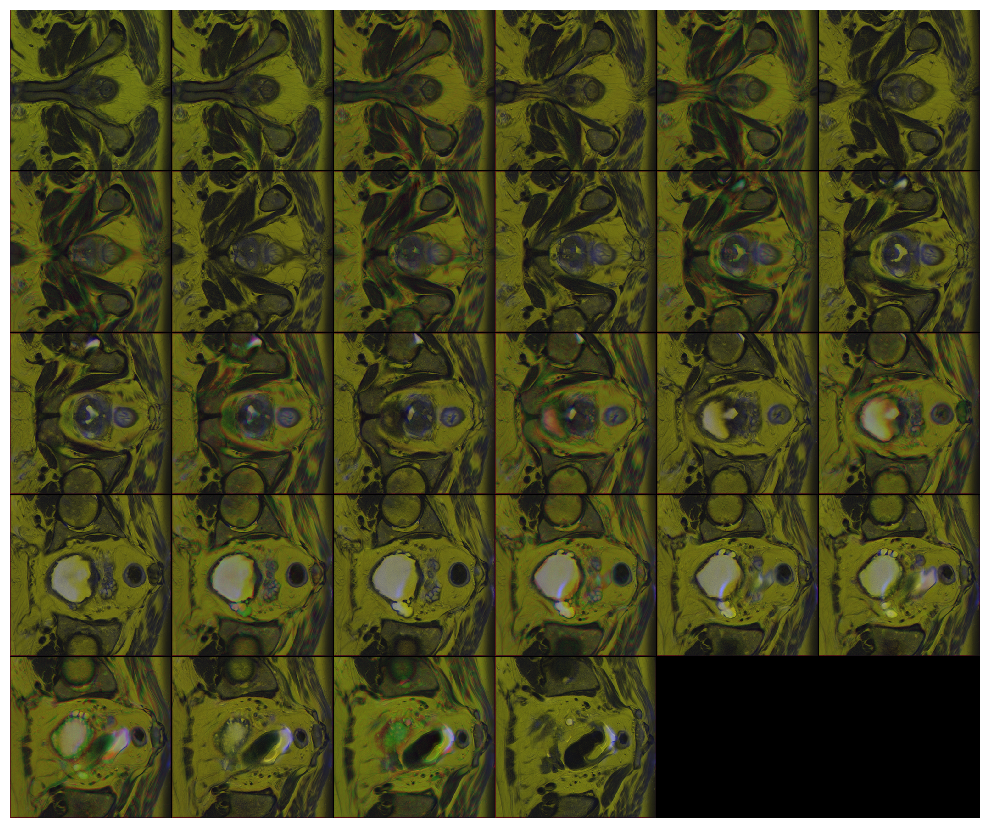

In [127]:
image = monai.transforms.ScaleIntensity()(image)
monai.visualize.matshow3d(image,channel_dim=0,frame_dim=-1,show=True)
plt.show()